# EDA

Author: Crystal

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [8]:
df = pd.read_pickle("/home/zz3hs/git/dspg21RnD/data/dspg21RnD/smaller-final-dataset.pkl")

df.reset_index(inplace = True)

In [9]:
df.columns

Index(['index', 'original index', 'PROJECT_ID', 'ABSTRACT', 'FY',
       'PROJECT_TERMS', 'PROJECT_TITLE', 'DEPARTMENT', 'AGENCY', 'IC_CENTER',
       'PROJECT_NUMBER', 'PROJECT_START_DATE', 'PROJECT_END_DATE',
       'CONTACT_PI_PROJECT_LEADER', 'OTHER_PIS', 'CONGRESSIONAL_DISTRICT',
       'DUNS_NUMBER', 'ORGANIZATION_NAME', 'ORGANIZATION_CITY',
       'ORGANIZATION_STATE', 'ORGANIZATION_ZIP', 'ORGANIZATION_COUNTRY',
       'BUDGET_START_DATE', 'BUDGET_END_DATE', 'CFDA_CODE', 'FY.y',
       'FY_TOTAL_COST', 'FY_TOTAL_COST_SUB_PROJECTS', 'ORG_COUNT', 'PI_COUNT',
       'nchar', 'final_frqwds_removed'],
      dtype='object')

In [42]:
df_small = df[["FY","PROJECT_TERMS","DEPARTMENT", "AGENCY", "PROJECT_START_DATE","BUDGET_START_DATE", "FY_TOTAL_COST", "FY_TOTAL_COST_SUB_PROJECTS"]]

In [43]:
df_small.head()

,FY,PROJECT_TERMS,DEPARTMENT,AGENCY,PROJECT_START_DATE,BUDGET_START_DATE,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS
0,2008,Active Sites; Affect; Alzheimer's Disease; Amy...,HHS,NIH,12/1/2005,NaN,3483.0,NaN
1,2008,Affect; Animal Model; Axon; Behavior; Behavior...,HHS,NIH,9/1/2007,NaN,39175.0,NaN
2,2008,Agreement; Antibodies; base; Binding; Biochemi...,HHS,NIH,1/2/2007,NaN,49646.0,NaN
3,2008,African; Analysis of Variance; Asians; Birth; ...,HHS,NIH,4/1/2006,NaN,20406.0,NaN
4,2010,cost; Health; interest; Manure; Parasitic nema...,USDA,NIFA,10/1/2009,NaN,NaN,NaN


In [44]:
df_small.dtypes

FY                             object
PROJECT_TERMS                  object
DEPARTMENT                     object
AGENCY                         object
PROJECT_START_DATE             object
BUDGET_START_DATE              object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
dtype: object

In [45]:
df_small["PROJECT_START_YEAR"]= df_small["PROJECT_START_DATE"].str[-4:]
df_small["BUDGET_START_YEAR"]= df_small["BUDGET_START_DATE"].str[-4:]

/home/zz3hs/.conda/envs/crystal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/zz3hs/.conda/envs/crystal/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
df_small.dtypes

FY                             object
PROJECT_TERMS                  object
DEPARTMENT                     object
AGENCY                         object
PROJECT_START_DATE             object
BUDGET_START_DATE              object
FY_TOTAL_COST                 float64
FY_TOTAL_COST_SUB_PROJECTS    float64
PROJECT_START_YEAR             object
BUDGET_START_YEAR              object
dtype: object

In [52]:

df_small["PROJECT_START_YEAR"] = df_small.PROJECT_START_YEAR.astype('Int64')
#df_small["BUDGET_START_YEAR"] = df_small.BUDGET_START_YEAR.astype('Int64')

/home/zz3hs/.conda/envs/crystal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_small["PROJECT_START_YEAR"]

0         2005
1         2007
2         2007
3         2006
4         2009
          ... 
690809    2018
690810    2019
690811    2018
690812    2019
690813    2018
Name: PROJECT_START_YEAR, Length: 690814, dtype: Int64

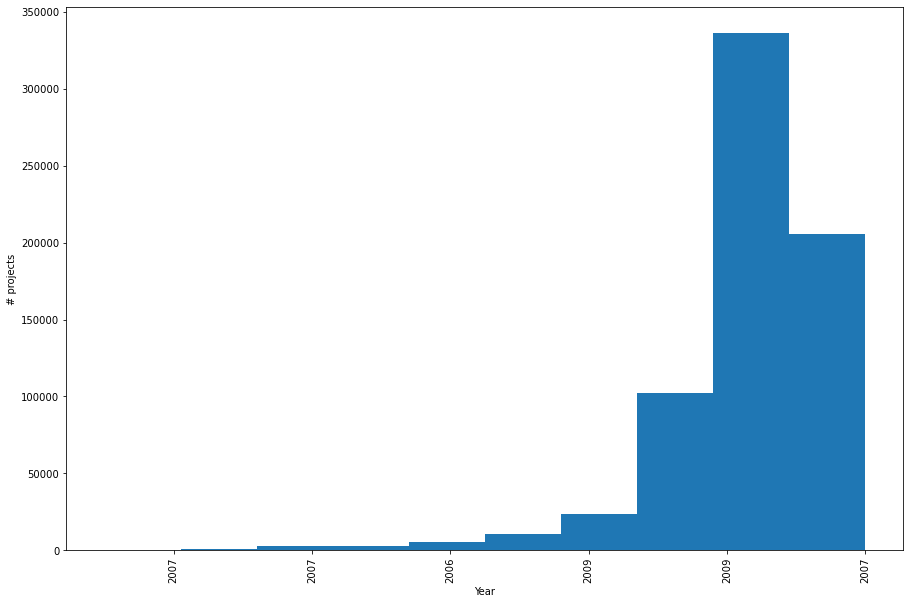

In [58]:
fig, ax = plt.subplots()
ax.hist(df_small["PROJECT_START_YEAR"])
ax.set_xlabel("Year")
ax.set_xticklabels(df_small["PROJECT_START_YEAR"], rotation = 90)
ax.set_ylabel("# projects")
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()